1. DATA PREPROCESSING

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [10]:
# Replace 'your_dataset.csv' with the actual path to your dataset file
df = pd.read_csv('datasets_house_prices.csv')

# Check if the data is loaded correctly
print(df.head())

   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05


Exploratory Data Analysis

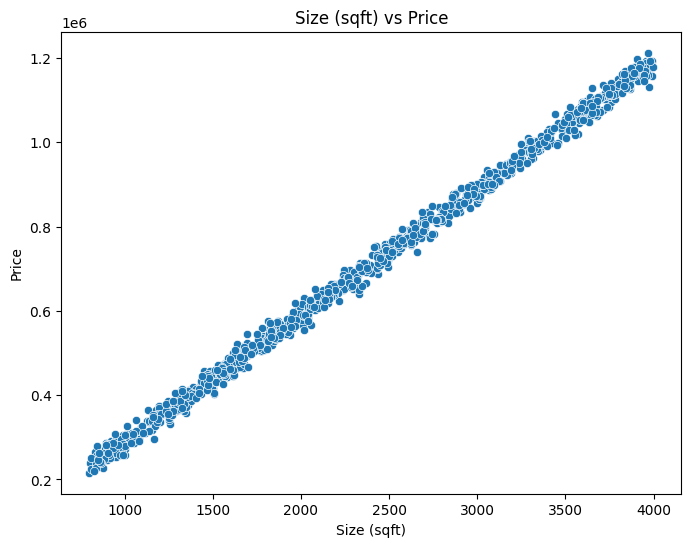

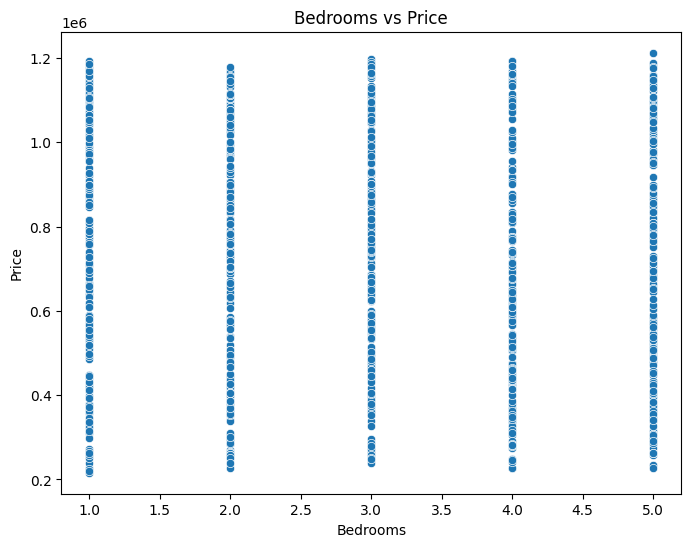

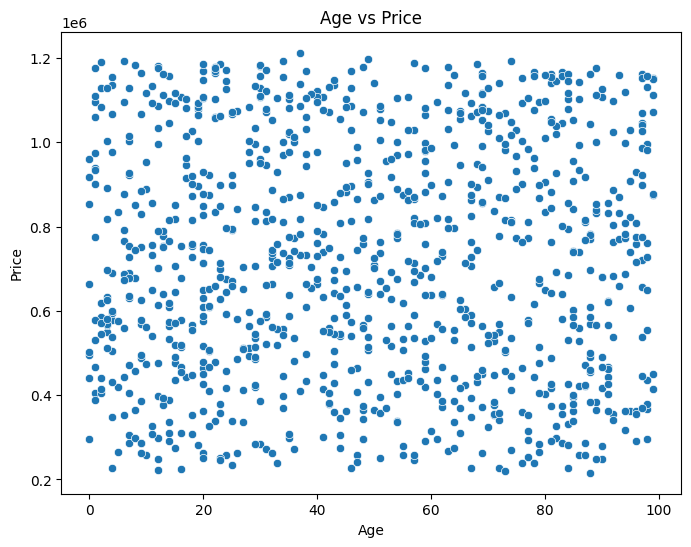

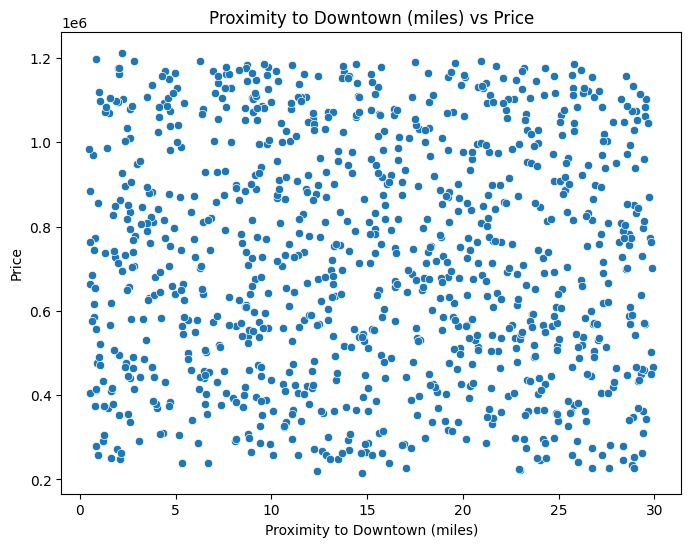

In [13]:
features = ['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']
for feature in features:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=df[feature], y=df['Price'])
    plt.title(f"{feature} vs Price")
    plt.show()

Data Preprocessing

In [14]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']]), columns=['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)'])


Model Development

In [15]:
X = df_scaled
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [17]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(f"MSE: {mse}")
print(f"R-Squared: {r2}")
print(f"Adjusted R-Squared: {adj_r2}")

MSE: 100214724.63128726
R-Squared: 0.9986314443568995
Adjusted R-Squared: 0.9986128876702134


In [18]:
coef = model.coef_
intercept = model.intercept_
print(f"Intercept: {intercept}")
print(f"Coefficients: {coef}")

Intercept: 718607.7680535176
Coefficients: [278975.28593843   6804.51900082  -6082.93925798  -8459.85395639]


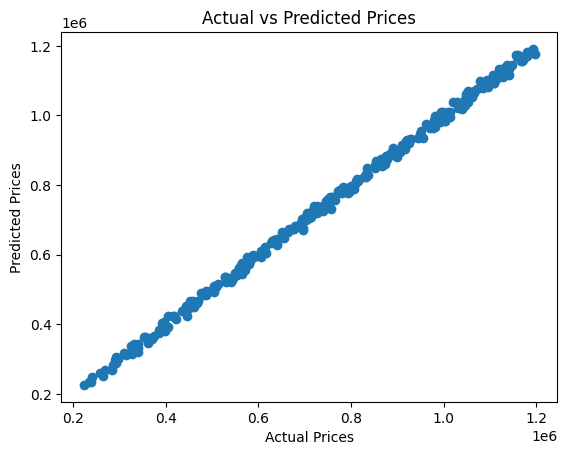

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

**Predicting House Prices with Multiple Regression**

The primary goal of this project is to build a predictive model for estimating house prices based on various factors such as house size, number of bedrooms, age, and proximity to downtown. Accurately predicting house prices is critical in real estate as it helps agents and potential buyers make informed decisions.

** Dataset Overview**

The dataset provided contains the following features:

Size (sq. ft.): Size of the house in square feet.
Bedrooms: Number of bedrooms.
Age: Age of the house in years.
Proximity to Downtown (miles): Distance from the downtown area.



**Data Exploration and Visualization**

To understand the relationships between the features and house prices, we conducted an exploratory data analysis (EDA). Scatter plots and correlation matrices were used to identify potential patterns.

3.1 Scatter Plots
Scatter plots for each feature versus house price show potential trends:

Size vs. Price: Larger houses tend to have higher prices.
Bedrooms vs. Price: A higher number of bedrooms correlates with higher prices.
Age vs. Price: Older houses appear to have slightly lower prices.
Proximity to Downtown vs. Price: Houses closer to downtown are generally more expensive.

**Data Preprocessing**

4.1 Handling Missing Data
Upon inspection, the dataset had some missing values, which were filled using the median for numerical variables to avoid skewing the data.

4.2 Standardization
We standardized the features using StandardScaler to ensure all features are on the same scale, as size and proximity have vastly different ranges.

**Model Development**

5.1 Data Splitting
The dataset was split into a training set (70%) and a test set (30%) using the train_test_split method.

5.2 Building the Multiple Regression Model
We implemented a multiple regression model using LinearRegression from the sklearn library.

**Model Evaluation**

6.1 Performance Metrics
The model was evaluated using the following metrics:

Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values.
R-squared: Indicates the proportion of variance explained by the model.
Adjusted R-squared: Adjusts the R-squared for the number of predictors.